In [2]:
%pylab inline
from astropy.io import fits
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc as ccdp
from ccdproc import trim_image
from ccdproc import subtract_overscan
import os
from astropy.nddata import CCDData
from skimage.feature import register_translation
import pickle as pickle
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, CircularAnnulus, aperture_photometry
from astropy.time import Time
import pandas as pd
from tabulate import tabulate

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Log M_star vs. Log T_eff

target_names = ["HT Lup","GW Lup","IM Lup","RU Lup","Sz 114","Sz 129","MY Lup","HD 142666","HD 143006","AS 205",
                "SR 4","Elias 20","DoAr 25","Elias 24","Elias 27","DoAr 33","WSB 52","WaOph 6","AS 209","HD 163296"]
#solar masses
log_Mstar = np.array([0.23, -0.34, -0.05, -0.2, -0.76, -0.08, 0.09, 0.2, 0.25, -0.06, -0.17, -0.32, -0.02, -0.11, 
                      -0.31, 0.04, -0.32, -0.17, -0.08, 0.31])
#kelvin
log_Teff = np.array([3.69,3.56,3.63,3.61,3.5,3.61,3.71,3.88,3.75,
                     3.63,3.61,3.59,3.63,3.63,3.59,3.65,3.57,3.62,3.63,3.97])

Text(0, 0.5, 'Log Teff')

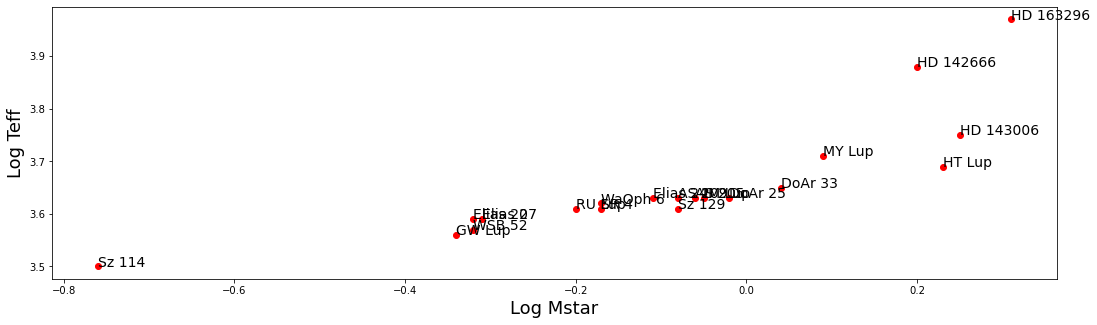

In [4]:
fig=plt.figure(1,figsize=(18,5))
ax1=fig.add_subplot(111)
ax1.plot(log_Mstar, log_Teff, 'ro')
for i, (x, y) in enumerate(zip(log_Mstar, log_Teff)):
    ax1.text(x,y,target_names[i],fontsize=14)
ax1.set_xlabel('Log Mstar',fontsize=18)
ax1.set_ylabel('Log Teff',fontsize=18)

#ax1.set_xlim(1,4)   #Set limits for x axis to make the plot look better
#ax1.set_ylim(90,400)

In [6]:
#header = ["Target","Log Mstar","Log Teff"]
mydata = {'Target': target_names, 'Log Mstar': log_Mstar, 'Log Teff': log_Teff}
print(tabulate(mydata, headers='keys', tablefmt="fancy_grid"))

╒═══════════╤═════════════╤════════════╕
│ Target    │   Log Mstar │   Log Teff │
╞═══════════╪═════════════╪════════════╡
│ HT Lup    │        0.23 │       3.69 │
├───────────┼─────────────┼────────────┤
│ GW Lup    │       -0.34 │       3.56 │
├───────────┼─────────────┼────────────┤
│ IM Lup    │       -0.05 │       3.63 │
├───────────┼─────────────┼────────────┤
│ RU Lup    │       -0.2  │       3.61 │
├───────────┼─────────────┼────────────┤
│ Sz 114    │       -0.76 │       3.5  │
├───────────┼─────────────┼────────────┤
│ Sz 129    │       -0.08 │       3.61 │
├───────────┼─────────────┼────────────┤
│ MY Lup    │        0.09 │       3.71 │
├───────────┼─────────────┼────────────┤
│ HD 142666 │        0.2  │       3.88 │
├───────────┼─────────────┼────────────┤
│ HD 143006 │        0.25 │       3.75 │
├───────────┼─────────────┼────────────┤
│ AS 205    │       -0.06 │       3.63 │
├───────────┼─────────────┼────────────┤
│ SR 4      │       -0.17 │       3.61 │
├───────────┼───